In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets import cifar10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

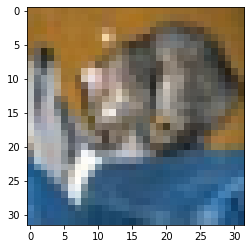

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 253s 50ms/step - loss: 1.4178 - sparse_categorical_accuracy: 0.4898 - val_loss: 1.1889 - val_sparse_categorical_accuracy: 0.5885
Epoch 2/10
5000/5000 [==============================] - 228s 46ms/step - loss: 1.1136 - sparse_categorical_accuracy: 0.6069 - val_loss: 1.0246 - val_sparse_categorical_accuracy: 0.6335
Epoch 3/10
5000/5000 [==============================] - 222s 44ms/step - loss: 0.9908 - sparse_categorical_accuracy: 0.6508 - val_loss: 0.9445 - val_sparse_categorical_accuracy: 0.6621
Epoch 4/10
5000/5000 [==============================] - 217s 43ms/step - loss: 0.8998 - sparse_categorical_accuracy: 0.6835 - val_loss: 0.9103 - val_sparse_categorical_accuracy: 0.6822
Epoch 5/10
5000/5000 [==============================] - 210s 42ms/step - loss: 0.8330 - sparse_categorical_accuracy: 0.7065 - val_loss: 0.9032 - val_sparse_categorical_accuracy: 0.6892
Epoch 6/10
5000/5000 [==============================] - 211s 42ms/step - lo

In [ ]:
history.history

{'loss': [1.4177736043930054,
  1.1135873794555664,
  0.9907952547073364,
  0.899787425994873,
  0.8329726457595825,
  0.7767962217330933,
  0.7274870872497559,
  0.6844242215156555,
  0.6504152417182922,
  0.6175810098648071],
 'sparse_categorical_accuracy': [0.4898200035095215,
  0.6068800091743469,
  0.6507599949836731,
  0.6834999918937683,
  0.7065399885177612,
  0.724839985370636,
  0.7439799904823303,
  0.7567600011825562,
  0.7671599984169006,
  0.7797600030899048],
 'val_loss': [1.1888725757598877,
  1.0246455669403076,
  0.9444596767425537,
  0.9103306531906128,
  0.9032381772994995,
  0.898361325263977,
  0.9009509682655334,
  0.8974515795707703,
  0.9184600710868835,
  0.9293514490127563],
 'val_sparse_categorical_accuracy': [0.5885000228881836,
  0.6334999799728394,
  0.6621000170707703,
  0.682200014591217,
  0.6891999840736389,
  0.6855000257492065,
  0.6930999755859375,
  0.6959999799728394,
  0.6917999982833862,
  0.6888999938964844]}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


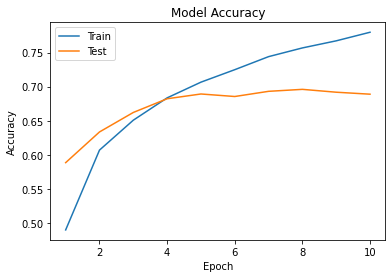

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


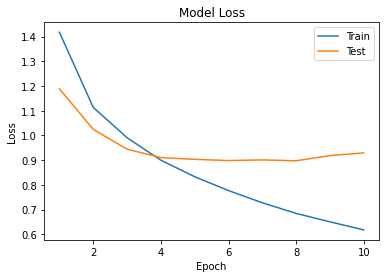

In [ ]:
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper_left')
plt.show()

epoch_range = range(1,11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper_left')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0e4a2ae10>)

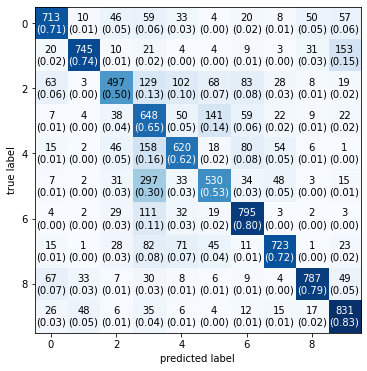

In [ ]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,show_normed=True,figsize=(6,6))
